In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5

# Load raw pattern and distribution

In [2]:
datafile = "/reg/d/psdm/amo/amox34117/scratch/haoyuan/experiment_data/amox34117_run_176_selection_based_on_psocake.h5"
statfile = "/reg/d/psdm/amo/amox34117/results/haoyuan/radial_distribution_and_intensity_run_176_all_2018_09_21_10_51_11.h5"

In [3]:
batch_start = 0
batch_stop = 4

pattern_holder = []

# Load the data and the index
with h5.File(datafile,'r') as h5file:
    for l in range(batch_start, batch_stop):
        pattern_holder.append(np.array(h5file['batch_{}_pattern'.format(l)]))
        
patterns = np.concatenate(pattern_holder, axis=0)

# Load the statistical quantities 
with h5.File(statfile, 'r') as h5file:
    statis ={ name:np.array(h5file[name]) for name in list(h5file.keys())}
    

# Show the pattern and the corresponding distributions

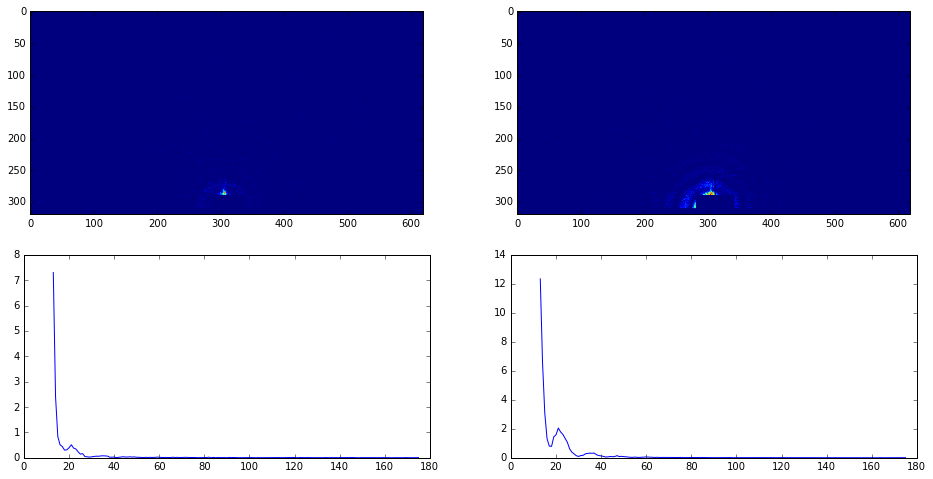

In [11]:
col_num = 2
index_to_show = np.random.permutation(patterns.shape[0])[:col_num]

# Set up the canvas
fig, axes = plt.subplots(nrows=2, ncols=col_num)
fig.set_figheight(8)
fig.set_figwidth(16)

# Plot the patterns
for l in range(col_num):
    axes[1, l].plot(statis['category_list'], statis['radial_mean'][index_to_show[l]])
    axes[0, l].imshow(patterns[index_to_show[l]].T)
    
# Show the canvas
plt.show()